In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib



In [205]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/carlos/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [206]:
# Cargar el archivo Titanic de Kaggle
df = pd.read_csv("/home/carlos/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv")

# Ver primeras filas
print(df.head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [207]:
print(df.shape)

# Info de columnas, tipos de datos y valores nulos
print(df.info())

# Valores estadísticos básicos
print(df.describe(include="all"))

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top    

/tmp/ipykernel_38846/1285975282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


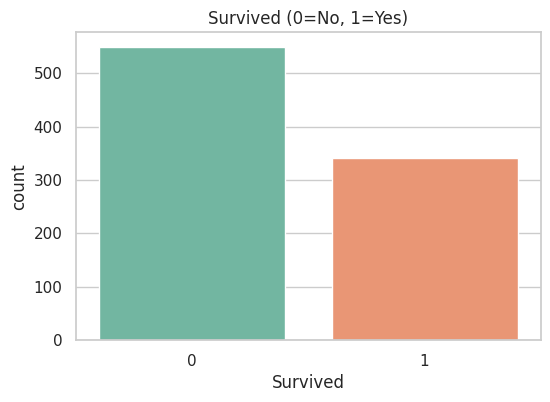

In [208]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survived (0=No, 1=Yes)")
plt.show()

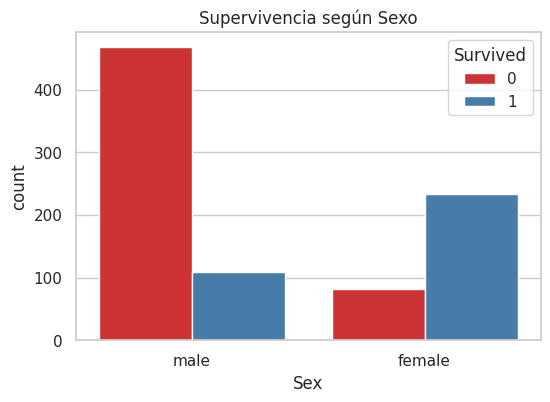

In [209]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Supervivencia según Sexo")
plt.show()


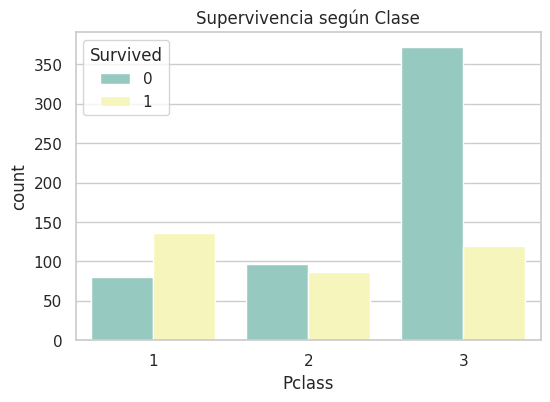

In [210]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Supervivencia según Clase")
plt.show()


In [211]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution (Histogram)")
    plt.show()

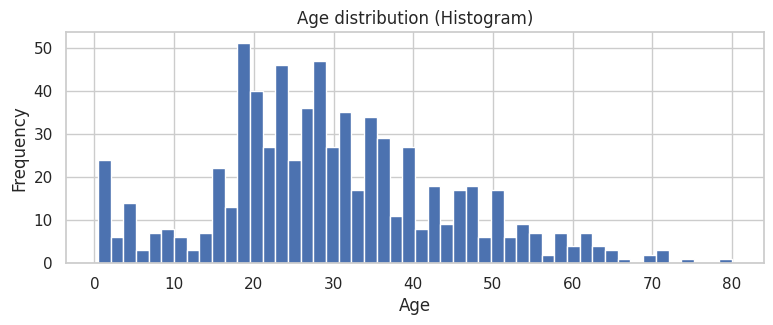

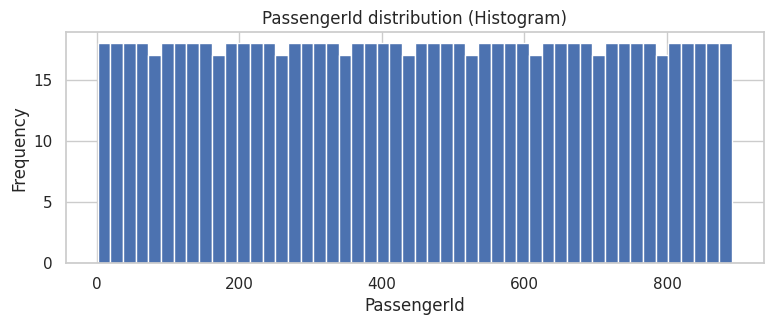

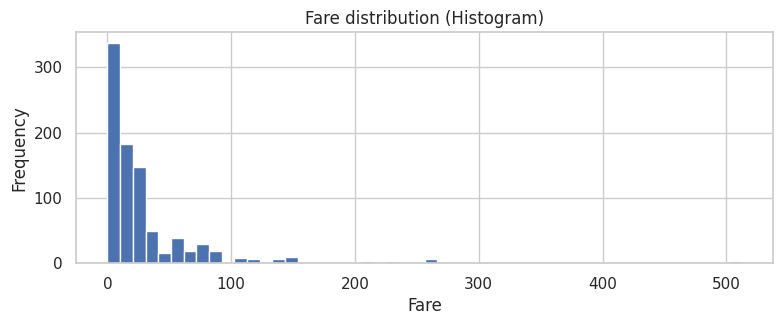

In [212]:
numeric_var = ["Age", "PassengerId", "Fare"]
for n in numeric_var:
    plot_hist(n)

In [213]:
# Pclass vs Survived
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [214]:
# Sex vs Survived
df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [215]:
# SibSp vs Survived
df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values("Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [216]:
# Parch vs Survived
df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values("Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


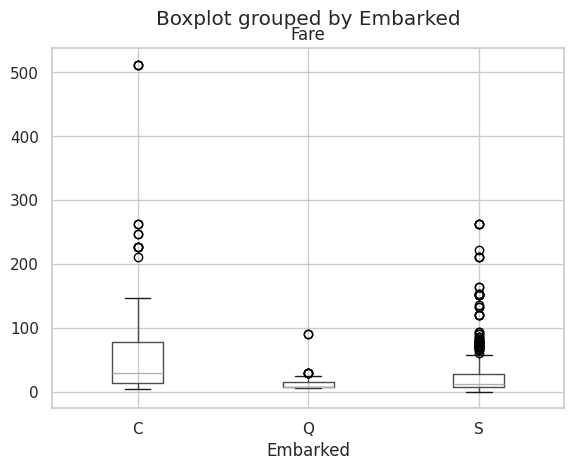

In [217]:
df.boxplot(column="Fare", by="Embarked")
plt.show()

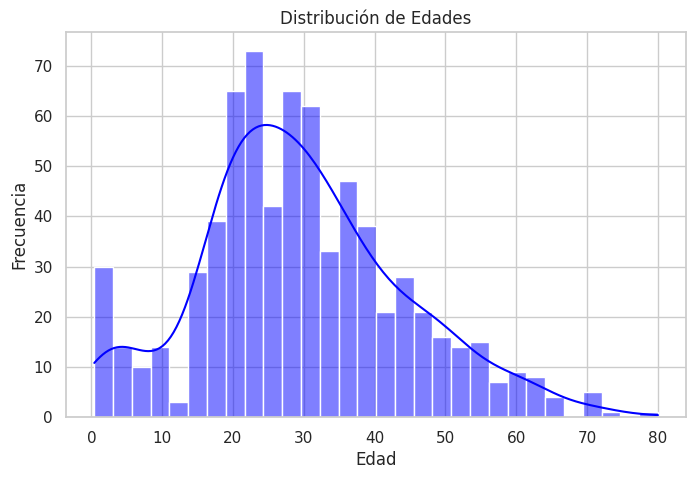

In [218]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


/tmp/ipykernel_38846/844352965.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Survived"]==1]["Age"].dropna(), shade=True, label="Sobrevivió", color="green")
/tmp/ipykernel_38846/844352965.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Survived"]==0]["Age"].dropna(), shade=True, label="No sobrevivió", color="red")


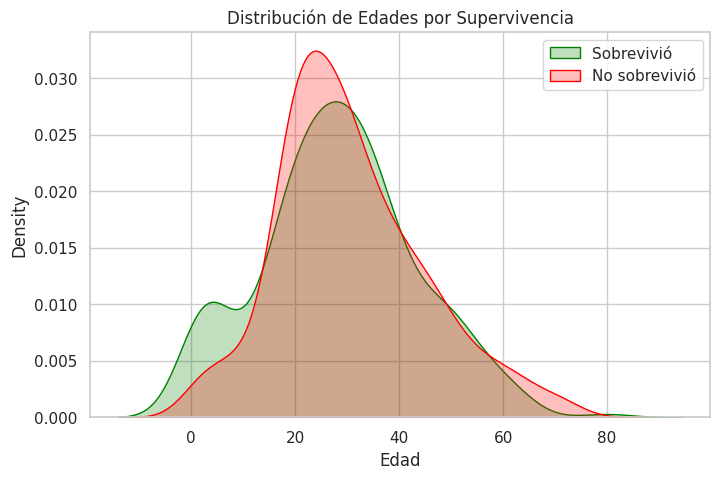

In [219]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df["Survived"]==1]["Age"].dropna(), shade=True, label="Sobrevivió", color="green")
sns.kdeplot(data=df[df["Survived"]==0]["Age"].dropna(), shade=True, label="No sobrevivió", color="red")
plt.title("Distribución de Edades por Supervivencia")
plt.xlabel("Edad")
plt.legend()
plt.show()

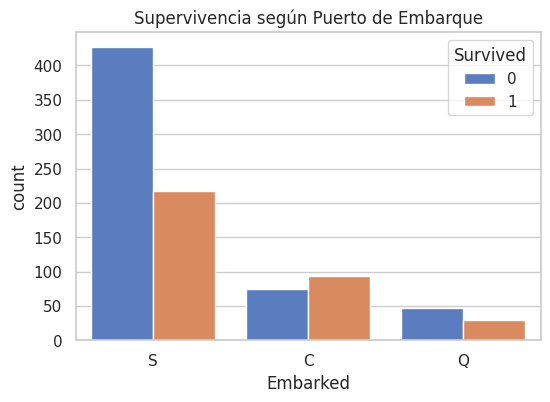

In [220]:
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=df, palette="muted")
plt.title("Supervivencia según Puerto de Embarque")
plt.show()

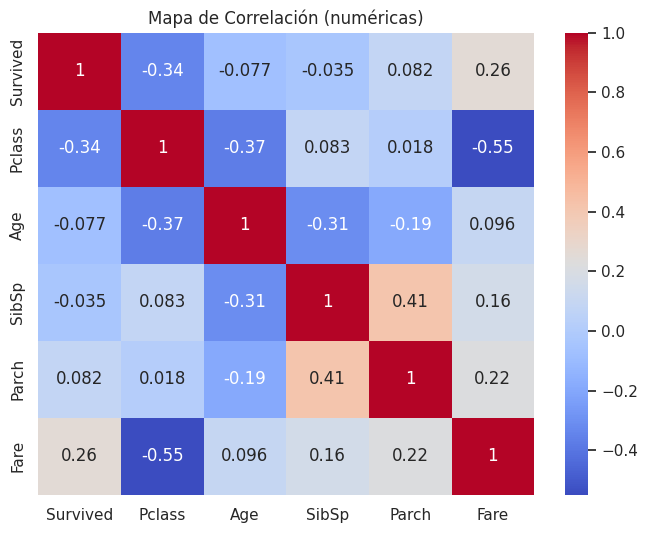

In [221]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlación (numéricas)")
plt.show()

In [222]:
# 1. Features y target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

X = df[features]
y = df[target]


In [223]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Pclass", "Sex", "Embarked"]



In [224]:
# Numéricas: imputar mediana + escalar
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
# Categóricas: imputar moda + OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [225]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [226]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=5, 
        min_samples_split=10, 
        min_samples_leaf=5, 
        random_state=42
    ))
])

In [227]:

# ==== 7. Buscar mejor random_state con varias métricas ====
mejor_state = None
mejor_f1 = 0.0

resultados = []  # guardar resultados para comparar

for state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state, stratify=y
    )
    
    # Entrenar
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluar
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    resultados.append((state, acc, f1, prec, rec))
    
    # Escoger el mejor random_state basado en F1 (más balanceado que accuracy)
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_state = state

print(f"Mejor random_state: {mejor_state} con F1 = {mejor_f1:.4f}")

# Mostrar también los 5 mejores
top5 = sorted(resultados, key=lambda x: x[2], reverse=True)[:5]
print("\nTop 5 random_state (ordenados por F1):")
for state, acc, f1, prec, rec in top5:
    print(f"state={state} | Acc={acc:.4f} | F1={f1:.4f} | Prec={prec:.4f} | Recall={rec:.4f}")

Mejor random_state: 77 con F1 = 0.8143

Top 5 random_state (ordenados por F1):
state=77 | Acc=0.8547 | F1=0.8143 | Prec=0.8028 | Recall=0.8261
state=8 | Acc=0.8603 | F1=0.8092 | Prec=0.8548 | Recall=0.7681
state=15 | Acc=0.8547 | F1=0.8088 | Prec=0.8209 | Recall=0.7971
state=65 | Acc=0.8603 | F1=0.8062 | Prec=0.8667 | Recall=0.7536
state=66 | Acc=0.8492 | F1=0.8058 | Prec=0.8000 | Recall=0.8116


In [228]:
# ==== 8. Reentrenar con el mejor random_state y evaluar ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=mejor_state, stratify=y
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy final: {acc:.4f}")
print(f"F1-score final: {f1:.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy final: 0.8547
F1-score final: 0.8143

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.80      0.83      0.81        69

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179



array([[96, 14],
       [12, 57]])

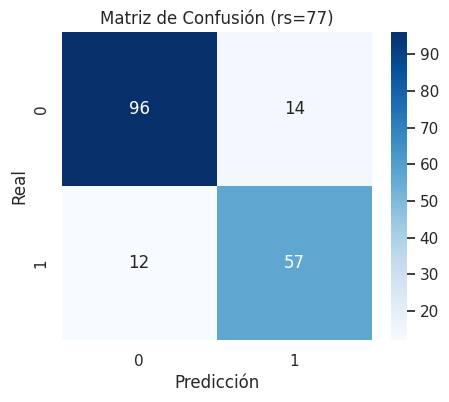

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión (rs={mejor_state})")
plt.show()


In [230]:
joblib.dump(clf, "titanic_pipeline.pkl")
print("Pipeline guardado en titanic_pipeline.pkl")


Pipeline guardado en titanic_pipeline.pkl


In [231]:
pipeline = joblib.load("titanic_pipeline.pkl")

nuevo_pasajero = pd.DataFrame([{
    "Pclass": 2,
    "Sex": "male",
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Embarked": "S"
}])

pred = pipeline.predict(nuevo_pasajero)[0]
probas = pipeline.predict_proba(nuevo_pasajero)[0]  # [p(no), p(sí)]
print("Predicción:", "Sobrevive" if pred == 1 else "No sobrevive")
print(f"Prob. NO sobrevive: {probas[0]*100:.2f}% | Prob. SÍ sobrevive: {probas[1]*100:.2f}%")


Predicción: No sobrevive
Prob. NO sobrevive: 93.50% | Prob. SÍ sobrevive: 6.50%
